### CS 178: Machine Learning &amp; Data Mining

# Discussion 04b

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import requests           # we'll use these for reading data from a url
from io import StringIO

from IPython import display

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import zero_one_loss as J01
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
    
seed=1234
_=plt.set_cmap('jet')
np.random.seed(seed)

<Figure size 640x480 with 0 Axes>

# Neural Networks

Let's start with some simple data for a classification example.  We'll use two features, $(x_1,x_2)$, and two classes, positive and negative (+1 vs. -1).

In [2]:
np.random.seed(0)
X, y = make_moons(n_samples=200,noise=0.2)
Xtr, Xte, ytr, yte = train_test_split(X, y)

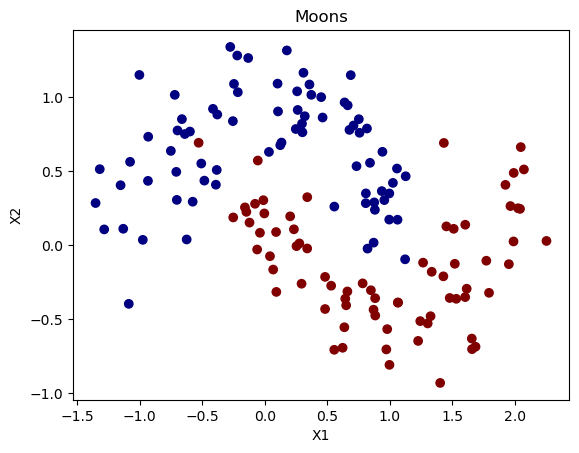

In [3]:
fig, ax = plt.subplots()

ax.scatter(Xtr[:,0], Xtr[:,1], c=ytr);   # scatter plot, using "y" as the color
ax.set_title("Moons"); 
ax.set_xlabel("X1");
ax.set_ylabel("X2");

## Two-layer MLP classifier

In [4]:
learner = MLPClassifier(
                # The loss is assumed to be "log-loss" (negative log-likelihood)
                # These parameters define the model "architecture" (shape, size, etc.):
                hidden_layer_sizes=(64), activation='relu', 
                # This determines how much L2 regularization to apply
                alpha = 0.0,
                # These control the optimization procedure:
                solver='sgd', learning_rate='constant', learning_rate_init=0.001, batch_size=16, 
                max_iter=200, n_iter_no_change=200,
                # This allows reproducibility across runs:
                random_state=seed
            )

learner.fit(Xtr,ytr);

/Users/chrischo/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


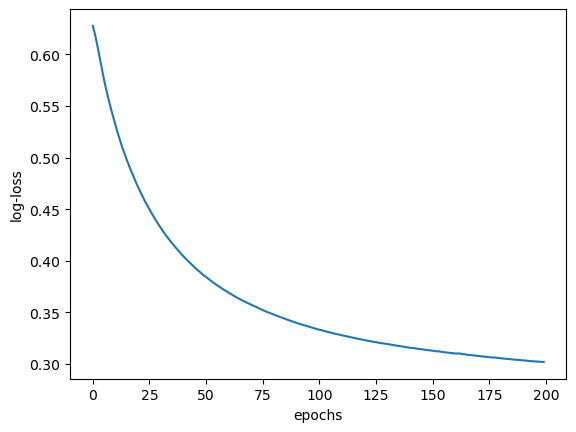

In [5]:
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

Is it done?  It's always hard to tell... 

In [ ]:
learner.max_iter = 2000; learner.n_iter_no_change=2000;
learner.fit(Xtr,ytr);

/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


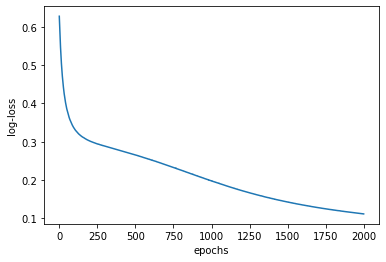

In [ ]:
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

Nope! Definitely not done.  Maybe we should try a higher learning rate (step size)?

In [ ]:
learner.max_iter = 2000; learner.n_iter_no_change=2000;
learner.learning_rate_init=0.01
learner.fit(Xtr,ytr);

/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


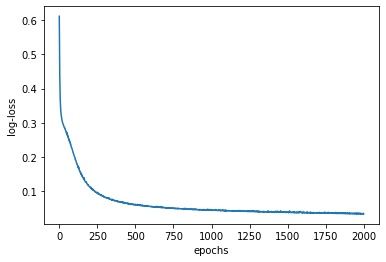

In [ ]:
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

What does our current classifier look like?

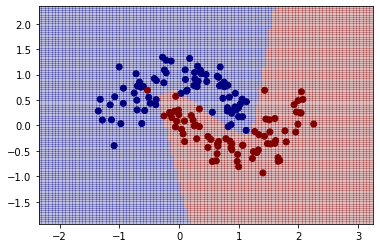

Error rate: 0.0067


In [ ]:
plot_kwargs = {'cmap':'jet', 
               'response_method':'predict', 
               'plot_method':'pcolormesh', 
               'shading':'auto', 
               'alpha':0.25,
               'grid_resolution':100 }

DecisionBoundaryDisplay.from_estimator(learner, Xtr, **plot_kwargs)
plt.scatter(Xtr[:,0],Xtr[:,1], c=ytr);
plt.show()
print(f'Error rate: {np.round(J01(learner.predict(Xtr),ytr),4)}')

**NOTE**: If you want to continue training more, after your optimization has stopped, you can use the ``warm_start=True`` flag.  By default, the model is re-initialized each time you call ``fit``, but with ``warm_start`` it will begin optimization from the current parameter values.  (This allows you not to lose your model's progress if you decide you want to change the learning rate or add regularization after you have already done some training.)

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>


## Complexity and Neural Networks

The number of layers and hidden nodes determines the representational power of the neural network.  For a two-layer NN, for example, the more nodes in the hidden layer, the more "trainable features" we are providing to the output layer's linear classifier; with more features, we increase its ability to fit (and overfit!).

For example, if we greatly reduce the number of hidden nodes, we will tend to learn a simpler decision function:

In [ ]:
learner = MLPClassifier(
                hidden_layer_sizes=(4), activation='relu', 
                alpha = 0.0,
                solver='sgd', learning_rate='constant', learning_rate_init=0.001, batch_size=16, 
                max_iter=2000, n_iter_no_change=2000,
                random_state=seed
            )

learner.fit(Xtr,ytr);

/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


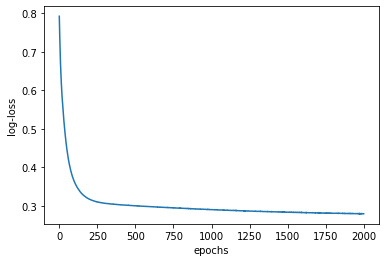

In [ ]:
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

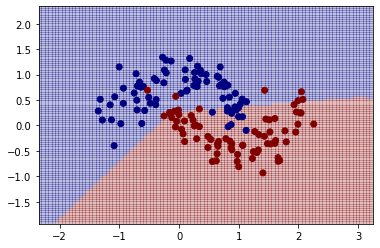

Error rate: 0.14


In [ ]:
DecisionBoundaryDisplay.from_estimator(learner, Xtr, **plot_kwargs)
plt.scatter(Xtr[:,0],Xtr[:,1], c=ytr);
plt.show()
print(f'Error rate: {np.round(J01(learner.predict(Xtr),ytr),4)}')

## Overfitting and Learning Curves

In [ ]:
np.random.seed(0)
X, y = make_moons(n_samples=2000,noise=0.4)
Xtr, Xte, ytr, yte = train_test_split(X, y)

/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


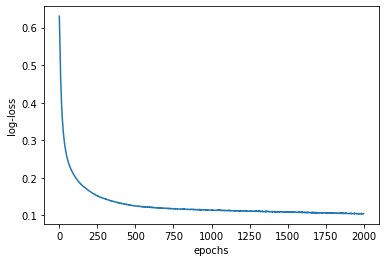

In [ ]:
learner = MLPClassifier(
                # The loss is assumed to be "log-loss" (negative log-likelihood)
                # These parameters define the model "architecture" (shape, size, etc.):
                hidden_layer_sizes=(64), activation='relu', 
                # This determines how much L2 regularization to apply
                alpha = 0.0,
                # These control the optimization procedure:
                solver='sgd', learning_rate='constant', learning_rate_init=0.01, batch_size=32, 
                max_iter=2000, n_iter_no_change=2000,
                # This allows reproducibility across runs:
                random_state=seed
            )

m_use = 50
learner.fit(Xtr[:m_use,:],ytr[:m_use]);
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

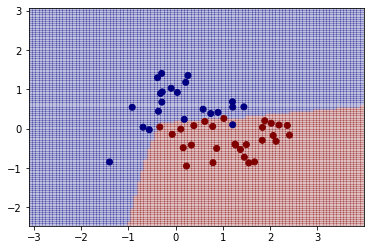

Error rate (train): 0.04
Error rate (test): 0.184


In [ ]:
DecisionBoundaryDisplay.from_estimator(learner, Xtr, **plot_kwargs)
plt.scatter(Xtr[:m_use,0],Xtr[:m_use,1], c=ytr[:m_use]);
plt.show()
print(f'Error rate (train): {np.round(J01(learner.predict(Xtr[:m_use,:]),ytr[:m_use]),4)}')
print(f'Error rate (test): {np.round(J01(learner.predict(Xte),yte),4)}')

/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


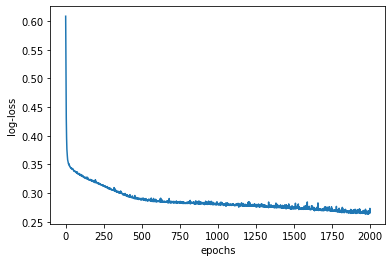

In [ ]:
m_use = 200
learner.fit(Xtr[:m_use,:],ytr[:m_use]);
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');

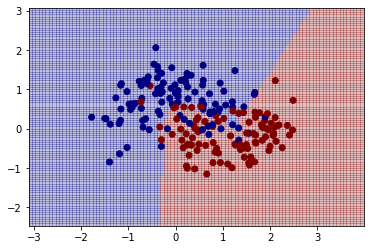

Error rate (train): 0.14
Error rate (test): 0.146


In [ ]:
DecisionBoundaryDisplay.from_estimator(learner, Xtr, **plot_kwargs)
plt.scatter(Xtr[:m_use,0],Xtr[:m_use,1], c=ytr[:m_use]);
plt.show()
print(f'Error rate (train): {np.round(J01(learner.predict(Xtr[:m_use,:]),ytr[:m_use]),4)}')
print(f'Error rate (test): {np.round(J01(learner.predict(Xte),yte),4)}')

Error rate (train): 0.12
Error rate (test): 0.156


/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


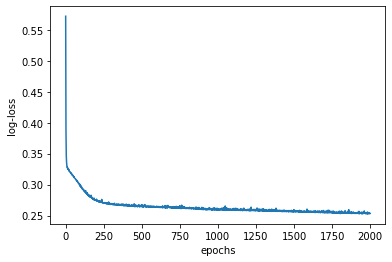

In [ ]:
m_use = 500
learner.fit(Xtr[:m_use,:],ytr[:m_use]);
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');
print(f'Error rate (train): {np.round(J01(learner.predict(Xtr[:m_use,:]),ytr[:m_use]),4)}')
print(f'Error rate (test): {np.round(J01(learner.predict(Xte),yte),4)}')

Error rate (train): 0.1267
Error rate (test): 0.142


/home/ihler/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


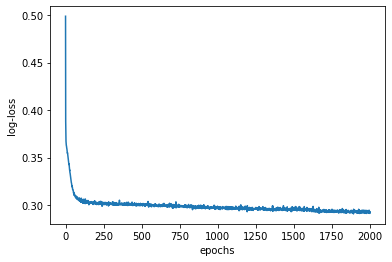

In [ ]:
m_use = 2000
learner.fit(Xtr[:m_use,:],ytr[:m_use]);
plt.plot(learner.loss_curve_); plt.ylabel('log-loss'); plt.xlabel('epochs');
print(f'Error rate (train): {np.round(J01(learner.predict(Xtr[:m_use,:]),ytr[:m_use]),4)}')
print(f'Error rate (test): {np.round(J01(learner.predict(Xte),yte),4)}')

In [ ]:
plt.plot()